# Market Risk- Returns and Risk

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

#import warnings
#warnings.filterwarnings("ignore")

#### Setting working directory

In [2]:
#import os
#os.chdir('F:/Data science/GL/FRA/')
#os.getcwd()

Let us now go ahead and read the dataset and check the first five rows of the dataset

#### Importing the dataset

In [3]:
stock_prices = pd.read_csv('Multiple Stock Data.csv')

#Glimpse of Data
stock_prices.head()

,Date,Bharti Airtel,DLF,ACC,BHEL,TCS,Maruti Suzuki,Reliance,Dr. Reddy,ITC,TATA Steel,Sensex
0,04/04/16,299,114,1320,74,1086,3269,507,2907,188,282,24673.83984
1,11/04/16,314,117,1345,80,1128,3555,521,2965,194,291,25626.75000
2,18/04/16,315,118,1294,77,1079,3636,508,3005,191,310,25838.14063
3,25/04/16,325,125,1321,75,1132,3615,480,2954,190,307,25606.61914
4,02/05/16,321,121,1305,76,1104,3639,474,2742,186,288,25228.50000


#### Fixing messy column names (containing spaces) for ease of use

In [4]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

C:\Users\cools\AppData\Local\Temp/ipykernel_3448/227833681.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')


#### Checking top 5 rows again

In [5]:
stock_prices.head()


,Date,Bharti_Airtel,DLF,ACC,BHEL,TCS,Maruti_Suzuki,Reliance,Dr_Reddy,ITC,TATA_Steel,Sensex
0,04/04/16,299,114,1320,74,1086,3269,507,2907,188,282,24673.83984
1,11/04/16,314,117,1345,80,1128,3555,521,2965,194,291,25626.75000
2,18/04/16,315,118,1294,77,1079,3636,508,3005,191,310,25838.14063
3,25/04/16,325,125,1321,75,1132,3615,480,2954,190,307,25606.61914
4,02/05/16,321,121,1305,76,1104,3639,474,2742,186,288,25228.50000


#### First, let us check the number of rows (observations) and the number of columns (variables)

In [6]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 209 
The number of columns (variables) is 12


#### Checking data types of all columns

In [7]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           209 non-null    object 
 1   Bharti_Airtel  209 non-null    int64  
 2   DLF            209 non-null    int64  
 3   ACC            209 non-null    int64  
 4   BHEL           209 non-null    int64  
 5   TCS            209 non-null    int64  
 6   Maruti_Suzuki  209 non-null    int64  
 7   Reliance       209 non-null    int64  
 8   Dr_Reddy       209 non-null    int64  
 9   ITC            209 non-null    int64  
 10  TATA_Steel     209 non-null    int64  
 11  Sensex         209 non-null    float64
dtypes: float64(1), int64(10), object(1)
memory usage: 19.7+ KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [8]:
stock_prices.describe()

,Bharti_Airtel,DLF,ACC,BHEL,TCS,Maruti_Suzuki,Reliance,Dr_Reddy,ITC,TATA_Steel,Sensex
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,350.023923,175.933014,1452.014354,72.066986,1559.129187,6751.588517,947.488038,2619.282297,243.411483,468.248804,33636.826229
std,63.412981,34.734782,138.215776,17.025019,416.373200,1463.828372,331.231503,345.415722,27.615719,108.987099,4628.304650
min,262.000000,106.000000,934.000000,20.000000,968.000000,3269.000000,457.000000,1892.000000,154.000000,270.000000,24673.839840
25%,308.000000,151.000000,1371.000000,63.000000,1150.000000,5761.000000,646.000000,2382.000000,228.000000,371.000000,29461.449220
50%,337.000000,177.000000,1466.000000,74.000000,1489.000000,6887.000000,925.000000,2612.000000,246.000000,470.000000,34142.148440
75%,373.000000,199.000000,1544.000000,83.000000,1963.000000,7658.000000,1238.000000,2891.000000,260.000000,547.000000,37462.988280
max,565.000000,262.000000,1711.000000,107.000000,2195.000000,9428.000000,1593.000000,3462.000000,309.000000,703.000000,41945.371090


#### Lets us plot & see price trend over time for different companies

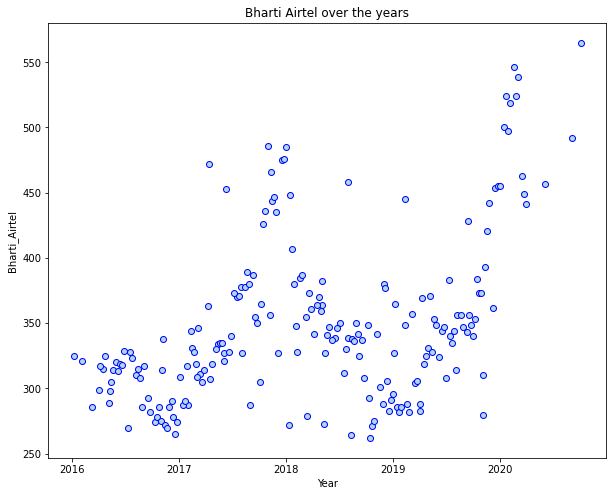

In [9]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Bharti_Airtel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Bharti_Airtel')
plt.title('Bharti Airtel over the years')
plt.show()

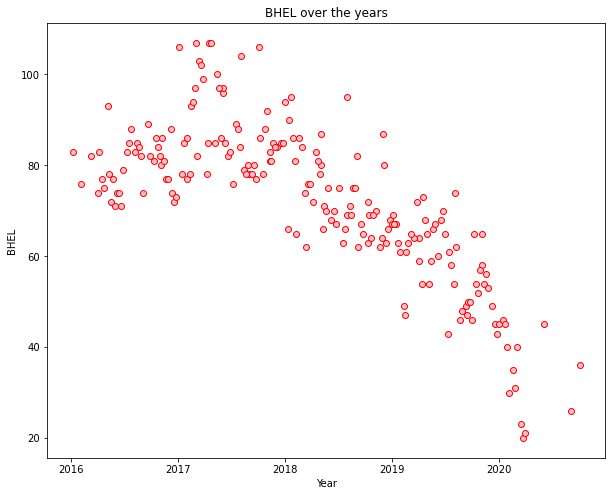

In [10]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['BHEL'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('BHEL')
plt.title('BHEL over the years')
plt.show()

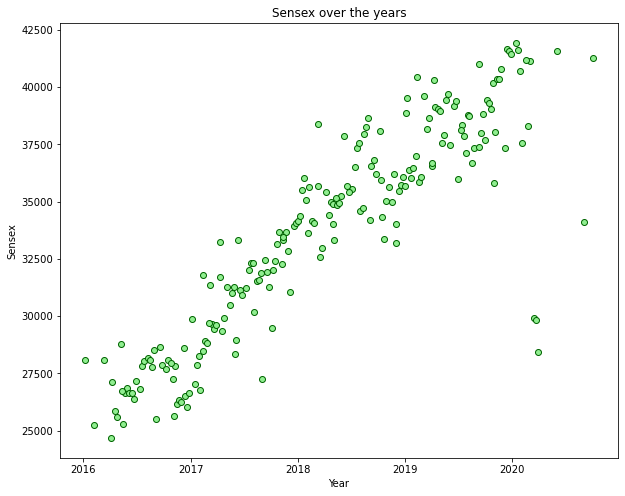

In [11]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Sensex'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Sensex')
plt.title('Sensex over the years')

plt.show()

# Analyzing returns

Steps for calculating returns from prices:
- Take logarithms
- Take differences

In [12]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

#### Checking the rows & columns of dataset

In [13]:
stock_returns.shape

(209, 11)

#### Checking top 5 rows 

In [14]:
stock_returns.head()

,Bharti_Airtel,DLF,ACC,BHEL,TCS,Maruti_Suzuki,Reliance,Dr_Reddy,ITC,TATA_Steel,Sensex
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.048949,0.025975,0.018762,0.077962,0.037945,0.083871,0.027239,0.019755,0.031416,0.031416,0.037893
2,0.003180,0.008511,-0.038656,-0.038221,-0.044411,0.022529,-0.025269,0.013401,-0.015585,0.063249,0.008215
3,0.031253,0.057629,0.020651,-0.026317,0.047951,-0.005792,-0.056695,-0.017117,-0.005249,-0.009725,-0.009001
4,-0.012384,-0.032523,-0.012186,0.013245,-0.025046,0.006617,-0.012579,-0.074473,-0.021277,-0.063887,-0.014877


### We now look at Means & Standard Deviations of these returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [18]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Bharti_Airtel    0.001868
DLF              0.000884
ACC             -0.001546
BHEL            -0.006055
TCS              0.002485
Maruti_Suzuki    0.001305
Reliance         0.003767
Dr_Reddy         0.000341
ITC             -0.000686
TATA_Steel      -0.000209
Sensex           0.000683
dtype: float64

#### Calculating stock standard deviation

In [16]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Bharti_Airtel    0.040267
DLF              0.061261
ACC              0.037464
BHEL             0.052869
TCS              0.034130
Maruti_Suzuki    0.036788
Reliance         0.038380
Dr_Reddy         0.042531
ITC              0.032008
TATA_Steel       0.046562
Sensex           0.020257
dtype: float64

In [21]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Bharti_Airtel,0.001868,0.040267
DLF,0.000884,0.061261
ACC,-0.001546,0.037464
BHEL,-0.006055,0.052869
TCS,0.002485,0.034130
Maruti_Suzuki,0.001305,0.036788
Reliance,0.003767,0.038380
Dr_Reddy,0.000341,0.042531
ITC,-0.000686,0.032008
TATA_Steel,-0.000209,0.046562


#### Let us plot & see what they say about stock prices

C:\Users\cools\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


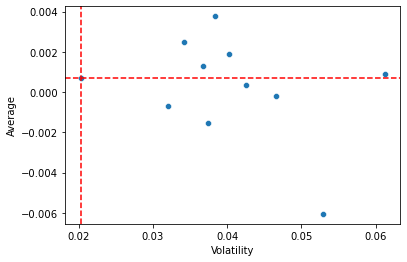

In [22]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.020257,linestyle='--', color = "red")  # sensex volatility
plot.axhline(y=0.000683,linestyle='--', color = "red")  # sensex average
plt.show()

In [25]:
df.loc['Sensex'][0]

0.0006830014468502015

In [21]:
df[df['Average'] > df.loc['Sensex'][0]].sort_values(by = 'Volatility')

,Average,Volatility
TCS,0.002485,0.034130
Maruti_Suzuki,0.001305,0.036788
Reliance,0.003767,0.038380
Bharti_Airtel,0.001868,0.040267
DLF,0.000884,0.061261


Stock with a lower mean & higher standard deviation do not play a role in a portfolio that has competing stock with more returns & less risk.
Thus for the data we have here, we are only left few stocks:
- Ones with higher return for a comparative or lower risk are considered better

# END